
# Advanced Image Clustering Notebook

## Introduction

Clustering is an essential unsupervised learning technique that categorizes similar objects based on their intrinsic characteristics. The primary aim is to partition data points into cohesive groups, ensuring that items within the same cluster share greater similarity than those in different clusters. This methodology is instrumental in extracting actionable insights across diverse fields, including customer segmentation, document classification, and image analysis.

## Problem Definition

This notebook focuses on the analysis of a dataset comprising images and their corresponding CSV files. Our objective is to employ clustering algorithms to systematically group these images based on visual similarity, paving the way for deeper insights and potential applications.

## Methodology Overview

1.  **Preprocessing and Feature Extraction**:
    
    -   Leverage a pre-trained Convolutional Neural Network (CNN), specifically VGG16, to extract rich feature representations from the images.
    -   Conduct necessary preprocessing to prepare the data for effective clustering.
2.  **Clustering Implementation**:
    
    -   Implement K-Means clustering algorithms on the derived feature vectors.
    -   Evaluate and compare the performance and suitability of these methods for our dataset.
3.  **Dimensionality Reduction**:
    
    -   Apply Principal Component Analysis (PCA) to reduce the dimensionality of feature vectors, facilitating 2D or 3D visualization of the clustered data.
4.  **Analysis and Evaluation**:
    
    -   Evaluate clustering outcomes using metrics such as silhouette score and homogeneity score.
    -   Offer insights and strategic recommendations for enhancing clustering models and propose avenues for further exploration.

This notebook will provide a comprehensive guide through each phase of the clustering process, showcasing the implementation and evaluation of sophisticated algorithms to derive meaningful insights from image data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/MyDrive/flower_images/flower_labels.csv')
df['image_path'] = '/content/drive/MyDrive/flower_images/' + df['file']
df.head()

,file,label,image_path
0,0001.png,0,/content/drive/MyDrive/flower_images/0001.png
1,0002.png,0,/content/drive/MyDrive/flower_images/0002.png
2,0003.png,2,/content/drive/MyDrive/flower_images/0003.png
3,0004.png,0,/content/drive/MyDrive/flower_images/0004.png
4,0005.png,0,/content/drive/MyDrive/flower_images/0005.png


In [3]:
# Load VGG16 model without the top layers
model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model.summary()

def extract_features(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        features = model.predict(img_array)
        return features.flatten()
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

# Assuming df is your DataFrame with image paths
features = []
for img in tqdm(df['image_path'], desc="Extracting features"):
    feature = extract_features(img)
    if feature is not None:
        features.append(feature)

features = np.array(features)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Extracting features:   0%|          | 0/210 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step


Extracting features:   0%|          | 1/210 [00:01<03:59,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


Extracting features:   1%|          | 2/210 [00:02<04:32,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step


Extracting features:   1%|▏         | 3/210 [00:03<04:37,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:   2%|▏         | 4/210 [00:05<04:34,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Extracting features:   2%|▏         | 5/210 [00:06<03:55,  1.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Extracting features:   3%|▎         | 6/210 [00:07<03:48,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Extracting features:   3%|▎         | 7/210 [00:08<03:33,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Extracting features:   4%|▍         | 8/210 [00:09<03:31,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Extracting features:   4%|▍         | 9/210 [00:09<03:20,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Extracting features:   5%|▍         | 10/210 [00:10<03:11,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Extracting features:   5%|▌         | 11/210 [00:11<03:15,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Extracting features:   6%|▌         | 12/210 [00:12<03:07,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Extracting features:   6%|▌         | 13/210 [00:13<02:58,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Extracting features:   7%|▋         | 14/210 [00:14<03:01,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Extracting features:   7%|▋         | 15/210 [00:15<03:00,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:   8%|▊         | 16/210 [00:16<03:27,  1.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step


Extracting features:   8%|▊         | 17/210 [00:18<03:39,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step


Extracting features:   9%|▊         | 18/210 [00:19<03:54,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features:   9%|▉         | 19/210 [00:20<03:36,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Extracting features:  10%|▉         | 20/210 [00:21<03:31,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features:  10%|█         | 21/210 [00:22<03:17,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Extracting features:  10%|█         | 22/210 [00:23<03:03,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Extracting features:  11%|█         | 23/210 [00:24<02:58,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Extracting features:  11%|█▏        | 24/210 [00:25<02:54,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Extracting features:  12%|█▏        | 25/210 [00:26<03:02,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Extracting features:  12%|█▏        | 26/210 [00:27<03:02,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Extracting features:  13%|█▎        | 27/210 [00:28<03:00,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Extracting features:  13%|█▎        | 28/210 [00:29<02:55,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Extracting features:  14%|█▍        | 29/210 [00:30<02:55,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step


Extracting features:  14%|█▍        | 30/210 [00:31<03:15,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step


Extracting features:  15%|█▍        | 31/210 [00:32<03:29,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  15%|█▌        | 32/210 [00:34<03:34,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Extracting features:  16%|█▌        | 33/210 [00:35<03:20,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features:  16%|█▌        | 34/210 [00:35<03:10,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Extracting features:  17%|█▋        | 35/210 [00:36<02:59,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Extracting features:  17%|█▋        | 36/210 [00:37<02:56,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Extracting features:  18%|█▊        | 37/210 [00:38<02:46,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features:  18%|█▊        | 38/210 [00:39<02:36,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Extracting features:  19%|█▊        | 39/210 [00:40<02:39,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Extracting features:  19%|█▉        | 40/210 [00:41<02:34,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Extracting features:  20%|█▉        | 41/210 [00:42<02:33,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features:  20%|██        | 42/210 [00:43<02:29,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Extracting features:  20%|██        | 43/210 [00:44<02:28,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  21%|██        | 44/210 [00:45<02:52,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step


Extracting features:  21%|██▏       | 45/210 [00:46<03:03,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step


Extracting features:  22%|██▏       | 46/210 [00:47<03:05,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


Extracting features:  22%|██▏       | 47/210 [00:48<02:54,  1.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Extracting features:  23%|██▎       | 48/210 [00:49<02:43,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features:  23%|██▎       | 49/210 [00:50<02:34,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Extracting features:  24%|██▍       | 50/210 [00:51<02:31,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Extracting features:  24%|██▍       | 51/210 [00:52<02:25,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features:  25%|██▍       | 52/210 [00:53<02:35,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Extracting features:  25%|██▌       | 53/210 [00:54<02:28,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Extracting features:  26%|██▌       | 54/210 [00:55<02:31,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features:  26%|██▌       | 55/210 [00:56<02:33,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Extracting features:  27%|██▋       | 56/210 [00:57<02:22,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features:  27%|██▋       | 57/210 [00:57<02:14,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Extracting features:  28%|██▊       | 58/210 [00:59<02:31,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step


Extracting features:  28%|██▊       | 59/210 [01:00<02:54,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step


Extracting features:  29%|██▊       | 60/210 [01:02<03:15,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features:  29%|██▉       | 61/210 [01:03<02:54,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Extracting features:  30%|██▉       | 62/210 [01:04<02:48,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features:  30%|███       | 63/210 [01:05<02:37,  1.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Extracting features:  30%|███       | 64/210 [01:05<02:26,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features:  31%|███       | 65/210 [01:06<02:19,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Extracting features:  31%|███▏      | 66/210 [01:07<02:18,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Extracting features:  32%|███▏      | 67/210 [01:08<02:13,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Extracting features:  32%|███▏      | 68/210 [01:09<02:07,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Extracting features:  33%|███▎      | 69/210 [01:10<02:08,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features:  33%|███▎      | 70/210 [01:11<02:11,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Extracting features:  34%|███▍      | 71/210 [01:12<02:05,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step


Extracting features:  34%|███▍      | 72/210 [01:13<02:23,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  35%|███▍      | 73/210 [01:15<02:44,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  35%|███▌      | 74/210 [01:16<02:51,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Extracting features:  36%|███▌      | 75/210 [01:17<02:31,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Extracting features:  36%|███▌      | 76/210 [01:18<02:19,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Extracting features:  37%|███▋      | 77/210 [01:19<02:16,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Extracting features:  37%|███▋      | 78/210 [01:20<02:12,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Extracting features:  38%|███▊      | 79/210 [01:21<02:10,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Extracting features:  38%|███▊      | 80/210 [01:22<02:05,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features:  39%|███▊      | 81/210 [01:23<02:05,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Extracting features:  39%|███▉      | 82/210 [01:24<02:07,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Extracting features:  40%|███▉      | 83/210 [01:24<02:01,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Extracting features:  40%|████      | 84/210 [01:25<01:59,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Extracting features:  40%|████      | 85/210 [01:26<01:53,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step


Extracting features:  41%|████      | 86/210 [01:28<02:12,  1.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


Extracting features:  41%|████▏     | 87/210 [01:29<02:25,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features:  42%|████▏     | 88/210 [01:31<02:41,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features:  42%|████▏     | 89/210 [01:32<02:31,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Extracting features:  43%|████▎     | 90/210 [01:33<02:14,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Extracting features:  43%|████▎     | 91/210 [01:34<02:08,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Extracting features:  44%|████▍     | 92/210 [01:35<02:00,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Extracting features:  44%|████▍     | 93/210 [01:35<01:57,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features:  45%|████▍     | 94/210 [01:36<01:51,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Extracting features:  45%|████▌     | 95/210 [01:37<01:44,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Extracting features:  46%|████▌     | 96/210 [01:38<01:42,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Extracting features:  46%|████▌     | 97/210 [01:39<01:42,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Extracting features:  47%|████▋     | 98/210 [01:40<01:44,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  47%|████▋     | 99/210 [01:42<02:08,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  48%|████▊     | 100/210 [01:43<02:27,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features:  48%|████▊     | 101/210 [01:44<02:13,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features:  49%|████▊     | 102/210 [01:45<02:03,  1.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Extracting features:  49%|████▉     | 103/210 [01:46<01:56,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features:  50%|████▉     | 104/210 [01:47<01:47,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Extracting features:  50%|█████     | 105/210 [01:48<01:43,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features:  50%|█████     | 106/210 [01:49<01:44,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Extracting features:  51%|█████     | 107/210 [01:50<01:37,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Extracting features:  51%|█████▏    | 108/210 [01:51<01:36,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Extracting features:  52%|█████▏    | 109/210 [01:52<01:36,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Extracting features:  52%|█████▏    | 110/210 [01:53<01:37,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Extracting features:  53%|█████▎    | 111/210 [01:54<01:35,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  53%|█████▎    | 112/210 [01:55<01:47,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  54%|█████▍    | 113/210 [01:57<01:55,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  54%|█████▍    | 114/210 [01:58<02:05,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Extracting features:  55%|█████▍    | 115/210 [01:59<01:57,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Extracting features:  55%|█████▌    | 116/210 [02:00<01:48,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Extracting features:  56%|█████▌    | 117/210 [02:01<01:37,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features:  56%|█████▌    | 118/210 [02:02<01:35,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Extracting features:  57%|█████▋    | 119/210 [02:03<01:27,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features:  57%|█████▋    | 120/210 [02:04<01:27,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Extracting features:  58%|█████▊    | 121/210 [02:05<01:27,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Extracting features:  58%|█████▊    | 122/210 [02:06<01:24,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Extracting features:  59%|█████▊    | 123/210 [02:07<01:19,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Extracting features:  59%|█████▉    | 124/210 [02:07<01:16,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features:  60%|█████▉    | 125/210 [02:08<01:13,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  60%|██████    | 126/210 [02:10<01:32,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


Extracting features:  60%|██████    | 127/210 [02:11<01:37,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


Extracting features:  61%|██████    | 128/210 [02:12<01:37,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Extracting features:  61%|██████▏   | 129/210 [02:13<01:31,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Extracting features:  62%|██████▏   | 130/210 [02:15<01:40,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Extracting features:  62%|██████▏   | 131/210 [02:16<01:30,  1.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Extracting features:  63%|██████▎   | 132/210 [02:17<01:25,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Extracting features:  63%|██████▎   | 133/210 [02:18<01:22,  1.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Extracting features:  64%|██████▍   | 134/210 [02:19<01:33,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


Extracting features:  64%|██████▍   | 135/210 [02:21<01:41,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step


Extracting features:  65%|██████▍   | 136/210 [02:23<01:45,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  65%|██████▌   | 137/210 [02:24<01:48,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  66%|██████▌   | 138/210 [02:26<01:49,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  66%|██████▌   | 139/210 [02:28<01:51,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Extracting features:  67%|██████▋   | 140/210 [02:28<01:35,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Extracting features:  67%|██████▋   | 141/210 [02:29<01:23,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Extracting features:  68%|██████▊   | 142/210 [02:30<01:20,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Extracting features:  68%|██████▊   | 143/210 [02:31<01:15,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features:  69%|██████▊   | 144/210 [02:32<01:12,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Extracting features:  69%|██████▉   | 145/210 [02:33<01:07,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Extracting features:  70%|██████▉   | 146/210 [02:34<01:06,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Extracting features:  70%|███████   | 147/210 [02:35<01:02,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Extracting features:  70%|███████   | 148/210 [02:37<01:14,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features:  71%|███████   | 149/210 [02:38<01:11,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step


Extracting features:  71%|███████▏  | 150/210 [02:40<01:18,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


Extracting features:  72%|███████▏  | 151/210 [02:41<01:21,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features:  72%|███████▏  | 152/210 [02:42<01:13,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Extracting features:  73%|███████▎  | 153/210 [02:43<01:07,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


Extracting features:  73%|███████▎  | 154/210 [02:44<01:03,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Extracting features:  74%|███████▍  | 155/210 [02:45<01:01,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Extracting features:  74%|███████▍  | 156/210 [02:46<01:00,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Extracting features:  75%|███████▍  | 157/210 [02:48<00:58,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Extracting features:  75%|███████▌  | 158/210 [02:48<00:55,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Extracting features:  76%|███████▌  | 159/210 [02:49<00:51,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features:  76%|███████▌  | 160/210 [02:50<00:47,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  77%|███████▋  | 161/210 [02:53<01:14,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  77%|███████▋  | 162/210 [02:54<01:11,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  78%|███████▊  | 163/210 [02:56<01:12,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features:  78%|███████▊  | 164/210 [02:57<01:04,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Extracting features:  79%|███████▊  | 165/210 [02:58<00:57,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Extracting features:  79%|███████▉  | 166/210 [02:59<00:52,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


Extracting features:  80%|███████▉  | 167/210 [03:00<00:50,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Extracting features:  80%|████████  | 168/210 [03:01<00:45,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Extracting features:  80%|████████  | 169/210 [03:02<00:43,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Extracting features:  81%|████████  | 170/210 [03:03<00:40,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features:  81%|████████▏ | 171/210 [03:04<00:38,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features:  82%|████████▏ | 172/210 [03:05<00:37,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Extracting features:  82%|████████▏ | 173/210 [03:06<00:36,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  83%|████████▎ | 174/210 [03:08<00:42,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  83%|████████▎ | 175/210 [03:09<00:45,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  84%|████████▍ | 176/210 [03:11<00:45,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Extracting features:  84%|████████▍ | 177/210 [03:12<00:40,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Extracting features:  85%|████████▍ | 178/210 [03:13<00:36,  1.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Extracting features:  85%|████████▌ | 179/210 [03:14<00:34,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Extracting features:  86%|████████▌ | 180/210 [03:14<00:31,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Extracting features:  86%|████████▌ | 181/210 [03:15<00:28,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Extracting features:  87%|████████▋ | 182/210 [03:16<00:27,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Extracting features:  87%|████████▋ | 183/210 [03:17<00:26,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Extracting features:  88%|████████▊ | 184/210 [03:18<00:24,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Extracting features:  88%|████████▊ | 185/210 [03:19<00:23,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features:  89%|████████▊ | 186/210 [03:21<00:28,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  89%|████████▉ | 187/210 [03:22<00:30,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step


Extracting features:  90%|████████▉ | 188/210 [03:24<00:28,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  90%|█████████ | 189/210 [03:25<00:29,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


Extracting features:  90%|█████████ | 190/210 [03:27<00:29,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Extracting features:  91%|█████████ | 191/210 [03:28<00:26,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Extracting features:  91%|█████████▏| 192/210 [03:29<00:22,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Extracting features:  92%|█████████▏| 193/210 [03:30<00:19,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Extracting features:  92%|█████████▏| 194/210 [03:31<00:16,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Extracting features:  93%|█████████▎| 195/210 [03:32<00:16,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Extracting features:  93%|█████████▎| 196/210 [03:33<00:14,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Extracting features:  94%|█████████▍| 197/210 [03:34<00:13,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Extracting features:  94%|█████████▍| 198/210 [03:35<00:11,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


Extracting features:  95%|█████████▍| 199/210 [03:36<00:11,  1.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features:  95%|█████████▌| 200/210 [03:38<00:12,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step


Extracting features:  96%|█████████▌| 201/210 [03:39<00:12,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Extracting features:  96%|█████████▌| 202/210 [03:40<00:10,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Extracting features:  97%|█████████▋| 203/210 [03:41<00:08,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Extracting features:  97%|█████████▋| 204/210 [03:42<00:06,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features:  98%|█████████▊| 205/210 [03:43<00:05,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Extracting features:  98%|█████████▊| 206/210 [03:44<00:03,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Extracting features:  99%|█████████▊| 207/210 [03:45<00:02,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features:  99%|█████████▉| 208/210 [03:46<00:01,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Extracting features: 100%|█████████▉| 209/210 [03:47<00:00,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features: 100%|██████████| 210/210 [03:48<00:00,  1.09s/it]


In [4]:
pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.430822,0.000000,5.476247,0.542736,0.000000,0.222573,0.195461,0.000000,0.000000,1.560913,...,8.277593,0.271068,2.508062,0.000000,0.009838,0.754308,0.000000,0.665055,0.134504,0.433677
1,0.000000,0.000000,5.825279,0.043406,0.000000,0.982318,0.363424,0.897467,0.000000,0.716446,...,7.045749,1.692013,0.062991,0.000000,0.000000,0.030042,0.019084,0.000000,0.440074,0.487105
2,0.000000,0.000000,7.474166,0.000000,1.092575,0.000000,0.321464,1.592200,0.000000,3.226406,...,3.222767,0.000000,0.000000,0.000000,0.820837,7.249001,0.000000,2.744368,0.495939,1.956002
3,2.092898,0.000000,9.991671,1.675276,0.292863,1.631880,0.657022,0.203146,0.000000,3.121235,...,5.419027,2.278673,3.143066,0.097754,0.042414,7.801702,0.000000,0.624501,0.787537,1.357668
4,0.593240,0.000000,9.163746,0.124684,0.720407,0.134874,3.241605,0.235250,0.211342,6.859980,...,3.816056,1.037120,3.811435,0.000000,0.223136,1.046199,0.350268,0.274467,1.042548,3.289084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.998087,0.258008,13.467101,1.169681,0.000000,2.732277,0.234700,0.533838,0.299599,0.177681,...,12.923645,0.000000,5.788613,0.299841,2.630212,0.000000,0.089526,6.763298,0.083582,0.000000
206,0.958114,0.369029,5.154335,2.552705,0.000000,0.000000,0.169075,0.702559,0.316218,1.428232,...,4.901963,1.315498,2.434534,0.099398,0.130483,1.266266,0.090563,2.120382,0.393838,3.843998
207,0.000000,0.436469,0.140684,0.000000,0.074445,2.137408,0.000000,0.000000,0.000000,0.936293,...,0.994595,0.041797,0.912251,0.000000,0.457131,2.016708,0.000000,0.451495,0.786391,8.383904
208,0.000000,0.000000,8.664833,0.199382,0.381845,0.673035,0.000000,0.838261,0.609993,0.057918,...,10.138243,0.043662,3.842359,0.000000,0.634195,0.000000,0.075564,0.195494,0.087459,1.498198


In [54]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
features

array([[0.02273219, 0.        , 0.12656818, ..., 0.0330156 , 0.01874842,
        0.04015327],
       [0.        , 0.        , 0.13463508, ..., 0.        , 0.06134143,
        0.04510011],
       [0.        , 0.        , 0.1727445 , ..., 0.13623974, 0.06912838,
        0.18110238],
       ...,
       [0.        , 0.02811869, 0.00325152, ..., 0.02241374, 0.1096142 ,
        0.7762492 ],
       [0.        , 0.        , 0.20026346, ..., 0.00970498, 0.01219082,
        0.13871518],
       [0.        , 0.        , 0.04442197, ..., 0.01537196, 0.        ,
        0.        ]], dtype=float32)

In [66]:
import pandas as pd
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df

,PC1,PC2
0,-0.780231,-1.137453
1,-0.324795,-1.117434
2,-1.568760,0.015621
3,1.074198,0.440208
4,0.820564,-0.462467
...,...,...
205,0.851567,2.368487
206,1.038215,0.344222
207,-1.735957,1.305150
208,-0.170674,-0.031670


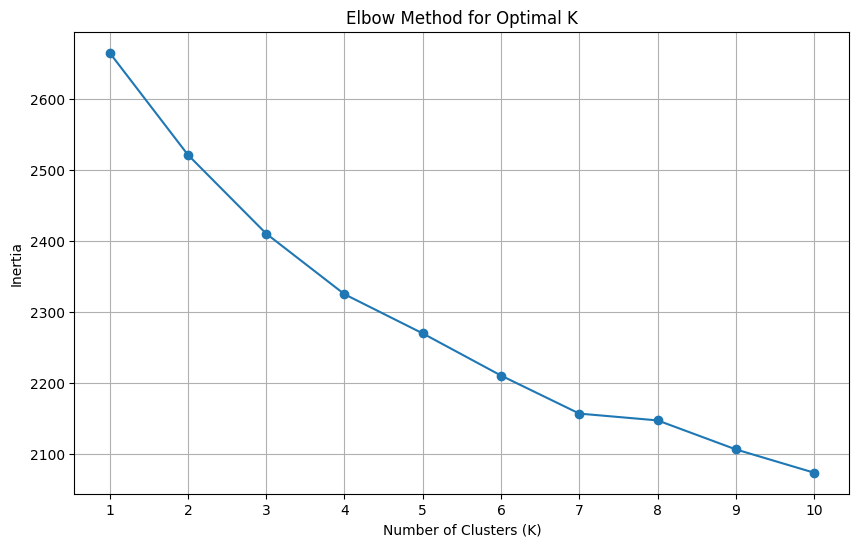

In [69]:
# Assuming 'features' is your array of feature vectors
inertia = []
K_range = range(1, 11)  # Adjust the range as needed

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42,n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()

In [70]:
K = 8
kmeans = KMeans(n_clusters=K, random_state=42,n_init=10)
kmeans.fit(principal_df)

kmeans_labels = kmeans.labels_

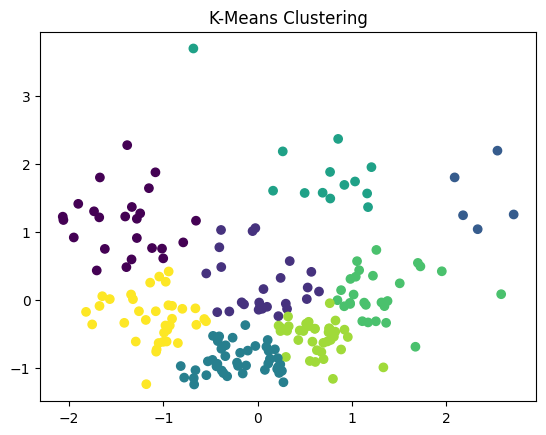

In [71]:
# Visualize clusters (Example with K-Means)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(principal_df, df['label'], test_size=0.2, random_state=42)

# Evaluate K-Means
kmeans_silhouette_score = silhouette_score(X_test, kmeans.predict(X_test))
kmeans_homogeneity_score = homogeneity_score(y_test, kmeans.predict(X_test))

print(f"K-Means Silhouette Score: {kmeans_silhouette_score}")
print(f"K-Means Homogeneity Score: {kmeans_homogeneity_score}")

K-Means Silhouette Score: 0.4795081317424774
K-Means Homogeneity Score: 0.48172064900071776
